# Evaluation of the Results for known CPs with fixed window size m (number of values) #
Notebook from https://github.com/ermshaua/time-series-segmentation-benchmark/blob/main/tssb/notebooks/competitor_evaluation.ipynb. Slightly edited.

In [34]:
import numpy as np
import pandas as pd

import pandas as pd
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set_color_codes()

import sys
sys.path.append("../../")

import orange3score

from tssb.utils import load_time_series_segmentation_datasets

Let's load the scores from the different methods.

In [35]:
df_ts = load_time_series_segmentation_datasets()
# selected_rows = df_ts[df_ts['window_size'] == 20]["dataset"].tolist()
# selected_rows = df_ts[df_ts['change_points'].apply(lambda lst: len(lst) == 3)]["dataset"].tolist()
selected_rows = df_ts[df_ts['time_series'].apply(lambda lst: len(lst) >= 8000 and len(lst) < 80000)]["dataset"].tolist()
print(len(selected_rows))

df_scores = pd.read_csv("./_segmentation_covering_known_stumpy_m_fluss_ALL.csv")
df_scores = df_scores[df_scores['dataset'].isin(selected_rows)]
df_scores

13


,dataset,flussOracle,fluss1,fluss2,fluss3,fluss4,fluss5,flussEnsSum,flussEnsMin
11,Computers,0.942118,0.493516,0.941950,0.942118,0.488665,0.488346,0.941614,0.493516
15,Crop,0.334651,0.247633,0.243074,0.334651,0.331123,0.182560,0.242804,0.336366
23,EOGVerticalSignal,0.335479,0.340074,0.333071,0.333318,0.335319,0.335479,0.338001,0.335479
24,FaceAll,0.547511,0.399217,0.405082,0.547511,0.407229,0.264901,0.256416,0.399217
25,FaceFour,0.787800,0.795087,0.541790,0.537905,0.538133,0.787800,0.512962,0.537905
28,Fish,0.537034,0.288193,0.428884,0.440206,0.427728,0.537034,0.283715,0.580194
29,FreezerRegularTrain,0.515706,0.519049,0.515706,0.466347,0.456977,0.459104,0.445281,0.456977
37,LargeKitchenAppliances,0.619278,0.923315,0.619278,0.563755,0.554059,0.573807,0.649696,0.619278
44,MiddlePhalanxOutlineAgeGroup,0.594355,0.331050,0.584878,0.583554,0.594355,0.587823,0.336737,0.346315
48,NonInvasiveFetalECGThorax1,0.336552,0.335010,0.335314,0.335680,0.336552,0.336531,0.335395,0.335314


Let's calculate the mean/median/std error.

In [36]:
for name in df_scores.columns[1:]:
    print(f"{name}: mean_error={np.round(df_scores[name].mean() * 100, 2)}")

flussOracle: mean_error=56.7
fluss1: mean_error=51.26
fluss2: mean_error=51.99
fluss3: mean_error=53.03
fluss4: mean_error=48.35
fluss5: mean_error=45.24
flussEnsSum: mean_error=47.33
flussEnsMin: mean_error=49.5


In [37]:
for name in df_scores.columns[1:]:
    print(f"{name}: median_error={np.round(df_scores[name].median() * 100, 2)}")

flussOracle: median_error=53.7
fluss1: median_error=41.44
fluss2: median_error=42.89
fluss3: median_error=46.63
fluss4: median_error=42.77
fluss5: median_error=45.91
flussEnsSum: median_error=40.26
flussEnsMin: median_error=45.7


In [38]:
for name in df_scores.columns[1:]:
    print(f"{name}: std_error={np.round(df_scores[name].std() * 100, 2)}")

flussOracle: std_error=22.17
fluss1: std_error=24.51
fluss2: std_error=22.54
fluss3: std_error=21.33
fluss4: std_error=17.57
fluss5: std_error=15.68
flussEnsSum: std_error=24.59
flussEnsMin: std_error=18.24


Let's compute the wins per method.

In [39]:
ranks = df_scores.rank(1, method = 'min', ascending=False)
means = np.array(ranks.mean(axis=0))

/tmp/ipykernel_3315/3065857076.py:1: FutureWarning: Dropping of nuisance columns in DataFrame.rank is deprecated; in a future version this will raise TypeError. Select only valid columns before calling rank.
  ranks = df_scores.rank(1, method = 'min', ascending=False)


In [40]:
for mean, name in zip(means, df_scores.columns[1:]):
    print(f"{name}:wins={ranks[ranks[name] == 1].shape[0]} rank={np.round(mean, 1)}")

flussOracle:wins=5 rank=1.8
fluss1:wins=6 rank=3.9
fluss2:wins=0 rank=4.6
fluss3:wins=2 rank=4.6
fluss4:wins=3 rank=4.5
fluss5:wins=0 rank=5.0
flussEnsSum:wins=0 rank=5.6
flussEnsMin:wins=4 rank=3.9


Let's plot and output the ranks.

In [41]:
cd = orange3score.compute_CD(means, df_scores.shape[0])
orange3score.graph_ranks(avranks=means, names=df_scores.columns[1:], cd=cd, width=5, reverse=True, textspace=1.3, filename="./ranks_known_fixed_m_specific_data_characteristics.png")


In [42]:
for name, rank in zip(df_scores.columns[1:], means):
    print(f"{name}: rank={np.round(rank, 5)}")

flussOracle: rank=1.84615
fluss1: rank=3.92308
fluss2: rank=4.61538
fluss3: rank=4.61538
fluss4: rank=4.46154
fluss5: rank=5.0
flussEnsSum: rank=5.61538
flussEnsMin: rank=3.92308


Let's compute wins/losses against the stumpy fluss algorithm (no dilation).

In [43]:
for rival in df_scores.columns[1:]:
    if rival == "fluss1": continue
    
    df_pair = df_scores[["fluss1", rival]]
    pair_ranks = df_pair.rank(1, method = 'min', ascending=True)
    
    wins = pair_ranks[(pair_ranks["fluss1"] == 1) & (pair_ranks[rival] == 2)].shape[0]
    losses = pair_ranks[(pair_ranks["fluss1"] == 2) & (pair_ranks[rival] == 1)].shape[0]
    ties = pair_ranks[(pair_ranks["fluss1"] == 1) & (pair_ranks[rival] == 1)].shape[0]
    
    assert wins + losses + ties == pair_ranks.shape[0]
    
    print(f"fluss1 vs {rival}: (wins/losses/ties): {wins}/{losses}/{ties}")

fluss1 vs flussOracle: (wins/losses/ties): 7/6/0
fluss1 vs fluss2: (wins/losses/ties): 6/7/0
fluss1 vs fluss3: (wins/losses/ties): 7/6/0
fluss1 vs fluss4: (wins/losses/ties): 6/7/0
fluss1 vs fluss5: (wins/losses/ties): 3/10/0
fluss1 vs flussEnsSum: (wins/losses/ties): 4/9/0
fluss1 vs flussEnsMin: (wins/losses/ties): 5/5/3


/tmp/ipykernel_3315/3886744767.py:8: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(fontsize)
/tmp/ipykernel_3315/3886744767.py:11: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(fontsize)


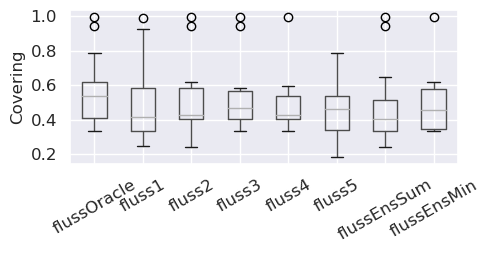

In [44]:
fontsize = 12
_, ax = plt.subplots(figsize=(5,2))

df_scores.boxplot(ax=ax, rot=30)
ax.set_ylabel("Covering", fontsize=fontsize)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

plt.savefig(f"./boxplot_known_fixed_m_specific_data_characteristics.png", bbox_inches="tight")